# Machine Learning 441: Assignment 2
Kellen Mossner 26024284

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pt = 1/72.27
textwidth_pt = 481.89
textwidth_inches = textwidth_pt * pt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,        # matches LaTeX document font size
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "savefig.bbox": "tight",
    "savefig.format": "pdf",
})

In [13]:
df = pd.read_csv('forestCover.csv', na_values='?')

In [3]:
df.head(5)

,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Water_Level,Observation_ID,Cover_Type
0,3208920,166,415.394727,6.0,0.691628,408,62,3137,225,242,...,0,0,0,0,0,0,0,2,1,2
1,2789020,137,343.302186,9.0,0.621245,30,2,1040,235,237,...,0,0,0,0,0,0,0,3,1,3
2,3384615,357,894.231390,9.0,-0.266086,362,15,3113,207,225,...,0,0,0,0,0,0,0,4,1,1
3,3348150,148,371.346939,6.0,0.786375,247,50,1207,228,240,...,0,0,0,0,0,0,0,5,1,2
4,3061955,124,310.783430,11.0,-0.335685,170,19,1595,238,232,...,0,0,0,0,0,0,0,6,1,2


In [4]:
df.dtypes

Elevation                               int64
Aspect                                  int64
Facet                                 float64
Slope                                 float64
Inclination                           float64
Horizontal_Distance_To_Hydrology        int64
Vertical_Distance_To_Hydrology          int64
Horizontal_Distance_To_Roadways         int64
Hillshade_9am                           int64
Hillshade_Noon                          int64
Hillshade_3pm                           int64
Horizontal_Distance_To_Fire_Points      int64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                             object
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                        

In [14]:
df["Soil_Type1"] = [1 if x == "negative" else 0 for x in df["Soil_Type1"]]
df.head(5)

,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Water_Level,Observation_ID,Cover_Type
0,3208920,166,415.394727,6.0,0.691628,408,62,3137,225,242,...,0,0,0,0,0,0,0,2,1,2
1,2789020,137,343.302186,9.0,0.621245,30,2,1040,235,237,...,0,0,0,0,0,0,0,3,1,3
2,3384615,357,894.231390,9.0,-0.266086,362,15,3113,207,225,...,0,0,0,0,0,0,0,4,1,1
3,3348150,148,371.346939,6.0,0.786375,247,50,1207,228,240,...,0,0,0,0,0,0,0,5,1,2
4,3061955,124,310.783430,11.0,-0.335685,170,19,1595,238,232,...,0,0,0,0,0,0,0,6,1,2


In [15]:
# convert numeric columns to categorical columns as per the data description
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    cardinality = df[col].nunique()
    if cardinality <= 2:
        df[col] = df[col].astype('object')
df.head(5)

,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Water_Level,Observation_ID,Cover_Type
0,3208920,166,415.394727,6.0,0.691628,408,62,3137,225,242,...,0,0,0,0,0,0,0,2,1,2
1,2789020,137,343.302186,9.0,0.621245,30,2,1040,235,237,...,0,0,0,0,0,0,0,3,1,3
2,3384615,357,894.231390,9.0,-0.266086,362,15,3113,207,225,...,0,0,0,0,0,0,0,4,1,1
3,3348150,148,371.346939,6.0,0.786375,247,50,1207,228,240,...,0,0,0,0,0,0,0,5,1,2
4,3061955,124,310.783430,11.0,-0.335685,170,19,1595,238,232,...,0,0,0,0,0,0,0,6,1,2


In [7]:
def quality_report(df):
    """
    Generate a quality report for the DataFrame.
    """

    report_cts = df.describe(include=[np.number]).T
    report_cts["Cardinality"] = df.nunique()
    report_cts["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
    report_cts.rename(
        columns={
            "50%": "Median",
            "25%": "1st Qrt",
            "75%": "3rd Qrt",
            "mean": "Mean",
            "count": "Count",
            "max": "Max",
            "std": "Std Dev",
            "min": "Min",
        },
        inplace=True,
    )
    report_cts["Count"] = len(df)
    report_cts.reset_index(inplace=True)
    report_cts.rename(columns={"index": "Feature"}, inplace=True)

    categorical_cols = df.select_dtypes(include=["object"]).columns
    cat_data = []
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        total_count = len(df[col])
        mode = value_counts.index[0] if len(value_counts) > 0 else None
        mode_freq = value_counts.iloc[0] if len(value_counts) > 0 else 0
        mode_pct = (mode_freq / total_count * 100) if total_count > 0 else 0
        second_mode = value_counts.index[1] if len(value_counts) > 1 else None
        second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
        second_mode_pct = (
            (second_mode_freq / total_count * 100) if total_count > 0 else 0
        )
        cat_data.append(
            {
                "Feature": col,
                "Count": total_count,
                "Missing Percentage": round(
                    (df[col].isnull().sum() / len(df)) * 100, 2
                ),
                "Unique": df[col].nunique(),
                "Mode": mode,
                "Mode Freq": mode_freq,
                "Mode %": round(mode_pct, 2),
                "2nd Mode": second_mode,
                "2nd Mode Freq": second_mode_freq,
                "2nd Mode %": round(second_mode_pct, 2),
                "Cardinality": df[col].nunique(),
            }
        )
    report_cat = pd.DataFrame(cat_data)

    # return both data quality reports
    return report_cts, report_cat
  
report_cts, report_cat = quality_report(df)

In [8]:
report_cts.head(50)

,Feature,Count,Mean,Std Dev,Min,1st Qrt,Median,3rd Qrt,Max,Cardinality,Missing Percentage
0,Elevation,581012,3.270099e+06,309383.131347,2.054195e+06,3.103945e+06,3.310580e+06,3.495115e+06,4.263090e+06,1978,0.00000
1,Aspect,581012,1.556568e+02,111.913721,0.000000e+00,5.800000e+01,1.270000e+02,2.600000e+02,3.600000e+02,361,0.00000
2,Facet,581012,3.899193e+02,280.343296,0.000000e+00,1.454909e+02,3.181596e+02,6.525290e+02,9.034134e+02,576099,0.00000
3,Slope,581012,1.410374e+01,7.488058,0.000000e+00,9.000000e+00,1.300000e+01,1.800000e+01,6.600000e+01,67,0.05129
4,Inclination,581012,-4.844843e-04,0.577741,-9.999989e-01,-5.005386e-01,-1.061842e-03,5.009318e-01,9.999920e-01,580946,0.00000
5,Horizontal_Distance_To_Hydrology,581012,5.062486e+03,952330.836884,0.000000e+00,1.080000e+02,2.180000e+02,3.840000e+02,3.742899e+08,576,0.00000
6,Vertical_Distance_To_Hydrology,581012,4.641886e+01,58.295232,-1.730000e+02,7.000000e+00,3.000000e+01,6.900000e+01,6.010000e+02,700,0.00000
7,Horizontal_Distance_To_Roadways,581012,2.350147e+03,1559.254870,0.000000e+00,1.106000e+03,1.997000e+03,3.328000e+03,7.117000e+03,5785,0.00000
8,Hillshade_9am,581012,2.121460e+02,26.769889,0.000000e+00,1.980000e+02,2.180000e+02,2.310000e+02,2.540000e+02,207,0.00000
9,Hillshade_Noon,581012,2.233187e+02,19.768697,0.000000e+00,2.130000e+02,2.260000e+02,2.370000e+02,2.540000e+02,185,0.00000


In [9]:
report_cat.head(60)

,Feature,Count,Missing Percentage,Unique,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %,Cardinality
0,Wilderness_Area1,581012,0.0,2,0,320216,55.11,1.0,260796,44.89,2
1,Wilderness_Area2,581012,0.0,2,0,551128,94.86,1.0,29884,5.14,2
2,Wilderness_Area3,581012,0.0,2,0,327648,56.39,1.0,253364,43.61,2
3,Wilderness_Area4,581012,0.0,2,0,544044,93.64,1.0,36968,6.36,2
4,Soil_Type1,581012,0.0,2,0,577981,99.48,1.0,3031,0.52,2
5,Soil_Type2,581012,0.0,2,0,573487,98.70,1.0,7525,1.30,2
6,Soil_Type3,581012,0.0,2,0,576189,99.17,1.0,4823,0.83,2
7,Soil_Type4,581012,0.0,2,0,568616,97.87,1.0,12396,2.13,2
8,Soil_Type5,581012,0.0,2,0,579415,99.73,1.0,1597,0.27,2
9,Soil_Type6,581012,0.0,2,0,574437,98.87,1.0,6575,1.13,2


In [10]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="My Data Report", explorative=True)

# profile.to_file("report_normal.html") 

### Data Quality Issues
- There remain features with missing values, with missing values indicated by the character symbol ‘?’.
- The Facet feature is correlated with the Aspect feature.
- The Inclination feature contains only noisy values.
- There remain features with outliers.
- There remain features with numeric ranges that differ significantly from one another.
- There are numerical and categorical features.
- Feature Water Level has cardinality of one.
- Feature Observation ID has a unique value for each observation.
- The class distribution remains skew.

### Data Pre-Processing for $k$-NN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

In [3]:
load = True

if load:
    # read in data
    X_train_knn, y_train_knn, X_test_knn, y_test_knn = np.load("data/knn_data.npz").values()
else:
    df_knn = df.copy()

    # 1. Remove correlated features
    df_knn.drop(columns=['Facet'], inplace=True)

    # 2. Remove noisy feature
    df_knn.drop(columns=['Inclination'], inplace=True)

    # 3. Remove feature with cardinality of 1
    df_knn.drop(columns=['Water_Level'], inplace=True)

    # 4. Remove feature with unique values
    df_knn.drop(columns=['Observation_ID'], inplace=True)

    X = df_knn.drop('Cover_Type', axis=1)  # Features
    y = df_knn['Cover_Type']  # Target variable

    # 5. Impute missing values if possible
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(X)
    X = imputer.transform(X)

    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print(X_train_knn.shape)
    # 6. Feature scaling
    scaler = StandardScaler()
    X_train_knn = scaler.fit_transform(X_train_knn)
    X_test_knn = scaler.transform(X_test_knn)

    print("Original train distribution:", np.bincount(y_train_knn) / len(y_train_knn))
    # 8. Fix class imbalances with SMOTE or undersampling
    # sm = SMOTE(random_state=42)
    # X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    # or use tomek links
    # tl = TomekLinks()
    # X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
    # or combine the two
    counts = Counter(y_train_knn)
    majority_class = max(counts, key=counts.get)
    majority_count = counts[majority_class]
    sm = SMOTETomek(random_state=42, sampling_strategy={cls: int(0.3 * majority_count) for cls, count in counts.items() if cls != 1 and cls != 2}) # oversample until the minority classes are a quarter of the majority class.
    X_train_knn, y_train_knn = sm.fit_resample(X_train_knn, y_train_knn)
    print(X_train_knn.shape)
    print("After SMOTE distribution:", np.bincount(y_train_knn) / len(y_train_knn))

    # save X_train, y_train and X_test, y_test
    np.savez("data/knn_data.npz", X_train_knn=X_train_knn, y_train_knn=y_train_knn, X_test_knn=X_test_knn, y_test_knn=y_test_knn)

print(X_train_knn.shape)

(633819, 54)


### $k$-Nearest Neighbours Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.96210843 0.9617005  0.96618492 0.96678715 0.96611463]
Average KNN CV F1 Macro Score: 0.9645791268791329
Std Dev KNN CV F1 Macro Score: 0.0022001167698867245


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.95277594 0.95313883 0.95853253 0.95953453 0.95900627]
Average KNN CV F1 Macro Score: 0.9565976182391663
Std Dev KNN CV F1 Macro Score: 0.00299130104876518


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.94464538 0.94609647 0.95147741 0.95287838 0.95250323]
Average KNN CV F1 Macro Score: 0.9495201713354658
Std Dev KNN CV F1 Macro Score: 0.00344941380969326


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric="manhattan")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.96165358 0.96136137 0.96592138 0.96673801 0.96624852]
Average KNN CV F1 Macro Score: 0.9643845732297056
Std Dev KNN CV F1 Macro Score: 0.002365284041578592


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.95326102 0.95419996 0.95912736 0.96051186 0.95993552]
Average KNN CV F1 Macro Score: 0.9574071450212914
Std Dev KNN CV F1 Macro Score: 0.003048520973527166


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
knn_scores = cross_val_score(knn_model, X_train_knn, y_train_knn, cv=5, scoring='f1_macro')
print("KNN CV F1 Macro Scores:", knn_scores)
print("Average KNN CV F1 Macro Score:", knn_scores.mean())
print("Std Dev KNN CV F1 Macro Score:", knn_scores.std())

KNN CV F1 Macro Scores: [0.94589469 0.94761824 0.95266922 0.95418876 0.95332868]
Average KNN CV F1 Macro Score: 0.9507399196848938
Std Dev KNN CV F1 Macro Score: 0.0033328516919970777


In [8]:
# fit the final model
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train_knn, y_train_knn)

y_pred = knn.predict(X_test_knn)
print(metrics.classification_report(y_test_knn, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.9247    0.9067    0.9156     63552
           2     0.9337    0.9221    0.9279     84991
           3     0.9035    0.8824    0.8928     10726
           4     0.6957    0.8544    0.7669       824
           5     0.6469    0.8866    0.7480      2848
           6     0.7536    0.8589    0.8028      5210
           7     0.8811    0.9642    0.9208      6153

    accuracy                         0.9127    174304
   macro avg     0.8199    0.8965    0.8535    174304
weighted avg     0.9155    0.9127    0.9136    174304



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
print("=== K-NN Performance Metrics ===")
print(f"Accuracy: {accuracy_score(y_test_knn, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test_knn, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test_knn, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test_knn, y_pred, average='macro'):.4f}")
print(f"Cohen's Kappa: {cohen_kappa_score(y_test_knn, y_pred):.4f}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test_knn, y_pred):.4f}")

=== K-NN Performance Metrics ===
Accuracy: 0.9127
Precision (macro): 0.8199
Recall (macro): 0.8965
F1-score (macro): 0.8535
Cohen's Kappa: 0.8611
Matthews Correlation Coefficient: 0.8612


### Data Pre-Processing for Decision Tree Classifier

In [19]:
load = True
if load:
    # read in data
    X_train_ct, y_train_ct, X_test_ct, y_test_ct = np.load("data/ct_data.npz").values()
else:    
    df_ct = df.copy()

    # 1. Remove correlated feature
    # df_ct.drop(columns=['Facet'], inplace=True)

    # 2. Remove feature with cardinality 1
    # df_ct.drop(columns=['Water_Level'], inplace=True)

    # 3. Remove feature with unique values
    # df_ct.drop(columns=['Observation_ID'], inplace=True)

    X = df_ct.drop('Cover_Type', axis=1)  # Features
    y = df_ct['Cover_Type']  # Target variable

    # 4. Impute missing values if possible
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(X)
    X = imputer.transform(X)

    # Generate test train split
    X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # 8. Fix class imbalances with SMOTE or undersampling
    # sm = SMOTE(random_state=42)
    # X_train, y_train = sm.fit_resample(X_train, y_train)
    # or use tomek links
    # tl = TomekLinks()
    # X, y = tl.fit_resample(X, y)
    # or combine the two
    counts = Counter(y_train_ct)
    majority_class = max(counts, key=counts.get)
    majority_count = counts[majority_class]
    sm = SMOTETomek(random_state=42, sampling_strategy={cls: int(0.3 * majority_count) for cls, count in counts.items() if cls != 1 and cls != 2}) # oversample until the minority classes are a quarter of the majority class.
    X_train_ct, y_train_ct = sm.fit_resample(X_train_ct, y_train_ct)
    print(X_train_ct.shape)
    print("After SMOTE distribution:", np.bincount(y_train_ct) / len(y_train_ct))

    # save X_train, y_train and X_test, y_test
    np.savez("data/ct_data.npz", X_train_ct=X_train_ct, y_train_ct=y_train_ct, X_test_ct=X_test_ct, y_test_ct=y_test_ct)

print(X_train_ct.shape)

(559727, 58)


### Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# # perform grid search cross validation for hyper parameter tuning
# param_grid = {
#     'max_depth': [3, 11, None],
#     'criterion': ['gini', 'entropy']
# }

# grid = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=param_grid,
#     cv=5,
#     scoring="f1_macro",
#     return_train_score=True
# )
# grid.fit(X_train, y_train)

# # print the results and the best parameters
# print("Best Parameters: ", grid.best_params_)
# print("Best Cross Validation Score: ", grid.best_score_)
# print(grid.cv_results_)

In [20]:
ct_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.5206537  0.5195222  0.51513103 0.51425478 0.5162075 ]
Average CT CV F1 Macro Score: 0.5171538414381158
Std Dev CT CV F1 Macro Score: 0.002499998943709817


In [ ]:
ct_model = DecisionTreeClassifier(criterion='entropy', max_depth=11)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.78498291 0.83023636 0.83517747 0.83210673 0.83016267]
Average CT CV F1 Macro Score: 0.8225332298374546
Std Dev CT CV F1 Macro Score: 0.0188631995678831


In [ ]:
ct_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.90268904 0.94092354 0.93462239 0.9330604  0.93424182]
Average CT CV F1 Macro Score: 0.9291074373931132
Std Dev CT CV F1 Macro Score: 0.013490401209349252


In [ ]:
ct_model = DecisionTreeClassifier(criterion='gini', max_depth=3)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.54330057 0.49266988 0.49801628 0.49982721 0.50216065]
Average CT CV F1 Macro Score: 0.5071949177188035
Std Dev CT CV F1 Macro Score: 0.018321950501522365


In [ ]:
ct_model = DecisionTreeClassifier(criterion='gini', max_depth=11)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.77652959 0.81860237 0.82348658 0.82517945 0.82547615]
Average CT CV F1 Macro Score: 0.8138548283172312
Std Dev CT CV F1 Macro Score: 0.01882437480812169


In [ ]:
ct_model = DecisionTreeClassifier(criterion='gini', max_depth=None)
ct_scores = cross_val_score(ct_model, X_train_ct, y_train_ct, cv=5, scoring='f1_macro') 
print("CT CV F1 Macro Scores:", ct_scores)
print("Average CT CV F1 Macro Score:", ct_scores.mean())
print("Std Dev CT CV F1 Macro Score:", ct_scores.std())

CT CV F1 Macro Scores: [0.89401944 0.93513236 0.93010221 0.93057363 0.93052739]
Average CT CV F1 Macro Score: 0.9240710047827676
Std Dev CT CV F1 Macro Score: 0.015137993481403147


In [10]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf = clf.fit(X_train_ct, y_train_ct)

y_pred = clf.predict(X_test_ct)
print(metrics.classification_report(y_test_ct, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.9290    0.9207    0.9248     63552
           2     0.9375    0.9360    0.9368     84991
           3     0.9155    0.9095    0.9125     10726
           4     0.7905    0.8471    0.8178       824
           5     0.7607    0.8371    0.7971      2848
           6     0.8238    0.8660    0.8444      5210
           7     0.9263    0.9524    0.9392      6153

    accuracy                         0.9252    174304
   macro avg     0.8691    0.8955    0.8818    174304
weighted avg     0.9257    0.9252    0.9254    174304



In [11]:
print("=== Classification Tree Performance Metrics ===")
print(f"Accuracy: {accuracy_score(y_test_ct, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test_ct, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test_ct, y_pred, average='macro'):.4f}")
print(f"F1-score (macro): {f1_score(y_test_ct, y_pred, average='macro'):.4f}")
print(f"Cohen's Kappa: {cohen_kappa_score(y_test_ct, y_pred):.4f}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test_ct, y_pred):.4f}")

=== Classification Tree Performance Metrics ===
Accuracy: 0.9252
Precision (macro): 0.8691
Recall (macro): 0.8955
F1-score (macro): 0.8818
Cohen's Kappa: 0.8803
Matthews Correlation Coefficient: 0.8803


### Results and Comparisons

In [22]:
# perform stratified kfold cross validation on the test set to evaluate the models performance on each fold for the k fold cross validation
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Initialize lists to store all metrics for KNN
knn_accuracy_scores = []
knn_precision_scores = []
knn_recall_scores = []
knn_f1_scores = []
knn_kappa_scores = []
knn_mcc_scores = []

for i, (train_index, test_index) in enumerate(skf.split(X_test_knn, y_test_knn)):
    # evaluate the model on each validation set:
    X_test_fold, y_test_fold = X_test_knn[test_index], y_test_knn[test_index]
    y_pred = knn.predict(X_test_fold)

    # Compute and store all metrics for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred, average='macro')
    recall = recall_score(y_test_fold, y_pred, average='macro')
    f1 = f1_score(y_test_fold, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_fold, y_pred)
    mcc = matthews_corrcoef(y_test_fold, y_pred)
    print(f"Fold {i + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Kappa: {kappa:.4f}, MCC: {mcc:.4f}")

    # Append to lists
    knn_accuracy_scores.append(accuracy)
    knn_precision_scores.append(precision)
    knn_recall_scores.append(recall)
    knn_f1_scores.append(f1)
    knn_kappa_scores.append(kappa)
    knn_mcc_scores.append(mcc)

# Convert to numpy arrays for easier handling
knn_accuracy_scores = np.array(knn_accuracy_scores)
knn_precision_scores = np.array(knn_precision_scores)
knn_recall_scores = np.array(knn_recall_scores)
knn_f1_scores = np.array(knn_f1_scores)
knn_kappa_scores = np.array(knn_kappa_scores)
knn_mcc_scores = np.array(knn_mcc_scores)

print("=== K-NN Cross-Validation Performance Metrics ===")
print(f"Mean Accuracy score: {knn_accuracy_scores.mean():.4f} ± {knn_accuracy_scores.std():.4f}")
print(f"Mean Precision score: {knn_precision_scores.mean():.4f} ± {knn_precision_scores.std():.4f}")
print(f"Mean Recall score: {knn_recall_scores.mean():.4f} ± {knn_recall_scores.std():.4f}")
print(f"Mean F1-macro score: {knn_f1_scores.mean():.4f} ± {knn_f1_scores.std():.4f}")
print(f"Mean Kappa score: {knn_kappa_scores.mean():.4f} ± {knn_kappa_scores.std():.4f}")
print(f"Mean MCC score: {knn_mcc_scores.mean():.4f} ± {knn_mcc_scores.std():.4f}")

Fold 1 - Accuracy: 0.9127, Precision: 0.8291, Recall: 0.8880, F1: 0.8554, Kappa: 0.8610, MCC: 0.8612
Fold 2 - Accuracy: 0.9065, Precision: 0.8050, Recall: 0.9023, F1: 0.8461, Kappa: 0.8515, MCC: 0.8517
Fold 3 - Accuracy: 0.9152, Precision: 0.8348, Recall: 0.8839, F1: 0.8559, Kappa: 0.8648, MCC: 0.8649
Fold 4 - Accuracy: 0.9105, Precision: 0.8208, Recall: 0.9037, F1: 0.8570, Kappa: 0.8576, MCC: 0.8578
Fold 5 - Accuracy: 0.9119, Precision: 0.8217, Recall: 0.8864, F1: 0.8502, Kappa: 0.8598, MCC: 0.8599
Fold 6 - Accuracy: 0.9177, Precision: 0.8276, Recall: 0.9018, F1: 0.8600, Kappa: 0.8690, MCC: 0.8692
Fold 7 - Accuracy: 0.9144, Precision: 0.8149, Recall: 0.9033, F1: 0.8532, Kappa: 0.8639, MCC: 0.8640
Fold 8 - Accuracy: 0.9133, Precision: 0.8166, Recall: 0.9022, F1: 0.8532, Kappa: 0.8622, MCC: 0.8623
Fold 9 - Accuracy: 0.9201, Precision: 0.8354, Recall: 0.9052, F1: 0.8663, Kappa: 0.8728, MCC: 0.8729
Fold 10 - Accuracy: 0.9121, Precision: 0.8122, Recall: 0.8934, F1: 0.8472, Kappa: 0.8602, M

In [23]:
# perform stratified kfold cross validation for Decision Tree
skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Initialize lists to store all metrics for Decision Tree
ct_accuracy_scores = []
ct_precision_scores = []
ct_recall_scores = []
ct_f1_scores = []
ct_kappa_scores = []
ct_mcc_scores = []

for i, (train_index, test_index) in enumerate(skf.split(X_test_ct, y_test_ct)):
    # evaluate the model on each validation set:
    X_test_fold, y_test_fold = X_test_ct[test_index], y_test_ct[test_index]
    y_pred = clf.predict(X_test_fold)

    # Compute and store all metrics for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred, average='macro')
    recall = recall_score(y_test_fold, y_pred, average='macro')
    f1 = f1_score(y_test_fold, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_fold, y_pred)
    mcc = matthews_corrcoef(y_test_fold, y_pred)
    print(f"Fold {i + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Kappa: {kappa:.4f}, MCC: {mcc:.4f}")
    
    # Append to lists
    ct_accuracy_scores.append(accuracy)
    ct_precision_scores.append(precision)
    ct_recall_scores.append(recall)
    ct_f1_scores.append(f1)
    ct_kappa_scores.append(kappa)
    ct_mcc_scores.append(mcc)

# Convert to numpy arrays for easier handling
ct_accuracy_scores = np.array(ct_accuracy_scores)
ct_precision_scores = np.array(ct_precision_scores)
ct_recall_scores = np.array(ct_recall_scores)
ct_f1_scores = np.array(ct_f1_scores)
ct_kappa_scores = np.array(ct_kappa_scores)
ct_mcc_scores = np.array(ct_mcc_scores)

print("=== CLF Cross-Validation Performance Metrics ===")
print(f"Mean Accuracy score: {ct_accuracy_scores.mean():.4f} ± {ct_accuracy_scores.std():.4f}")
print(f"Mean Precision score: {ct_precision_scores.mean():.4f} ± {ct_precision_scores.std():.4f}")
print(f"Mean Recall score: {ct_recall_scores.mean():.4f} ± {ct_recall_scores.std():.4f}")
print(f"Mean F1-macro score: {ct_f1_scores.mean():.4f} ± {ct_f1_scores.std():.4f}")
print(f"Mean Kappa score: {ct_kappa_scores.mean():.4f} ± {ct_kappa_scores.std():.4f}")
print(f"Mean MCC score: {ct_mcc_scores.mean():.4f} ± {ct_mcc_scores.std():.4f}")

Fold 1 - Accuracy: 0.9252, Precision: 0.8763, Recall: 0.8901, F1: 0.8829, Kappa: 0.8803, MCC: 0.8803
Fold 2 - Accuracy: 0.9253, Precision: 0.8593, Recall: 0.9052, F1: 0.8805, Kappa: 0.8805, MCC: 0.8806
Fold 3 - Accuracy: 0.9232, Precision: 0.8596, Recall: 0.8722, F1: 0.8652, Kappa: 0.8770, MCC: 0.8770
Fold 4 - Accuracy: 0.9221, Precision: 0.8677, Recall: 0.8862, F1: 0.8766, Kappa: 0.8753, MCC: 0.8753
Fold 5 - Accuracy: 0.9274, Precision: 0.8703, Recall: 0.8861, F1: 0.8778, Kappa: 0.8835, MCC: 0.8836
Fold 6 - Accuracy: 0.9208, Precision: 0.8537, Recall: 0.8891, F1: 0.8701, Kappa: 0.8733, MCC: 0.8733
Fold 7 - Accuracy: 0.9286, Precision: 0.8698, Recall: 0.8960, F1: 0.8824, Kappa: 0.8857, MCC: 0.8857
Fold 8 - Accuracy: 0.9250, Precision: 0.8700, Recall: 0.9015, F1: 0.8850, Kappa: 0.8799, MCC: 0.8799
Fold 9 - Accuracy: 0.9269, Precision: 0.8714, Recall: 0.9047, F1: 0.8871, Kappa: 0.8830, MCC: 0.8830
Fold 10 - Accuracy: 0.9300, Precision: 0.8900, Recall: 0.9135, F1: 0.9006, Kappa: 0.8879, M

Cross-validation F1-macro scores:
         KNN  Classification Tree
0   0.855430             0.882858
1   0.846096             0.880541
2   0.855927             0.865201
3   0.856993             0.876599
4   0.850164             0.877785
5   0.860018             0.870052
6   0.853249             0.882403
7   0.853196             0.885028
8   0.866291             0.887088
9   0.847246             0.900605
10  0.847624             0.882334
11  0.850815             0.886917
12  0.854924             0.881263
13  0.854483             0.887606
14  0.845674             0.881825
15  0.848211             0.868771
16  0.846304             0.880121
17  0.858987             0.889673
18  0.865587             0.875909
19  0.855092             0.892014

Mean F1-macro scores:
KNN: 0.8536 ± 0.0059
Classification Tree: 0.8817 ± 0.0080

Statistical Analysis:
Rank difference: 1.000
Critical difference: 0.620
Statistical significance: Yes
P-value: 0.0000019073


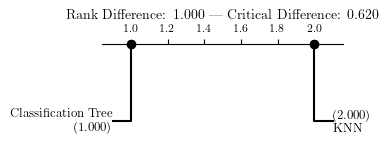

In [ ]:
import scikit_posthocs as sp
from scipy.stats import rankdata, wilcoxon
pt = 1/72.27
ieee_column_width_pt = 252 
ieee_text_width_pt = 516 
ieee_column_width_inches = ieee_column_width_pt * pt
ieee_text_width_inches = ieee_text_width_pt * pt

def scikit_posthocs_cd_plot(algorithm1_scores, algorithm2_scores, 
                           algorithm1_name="KNN", 
                           algorithm2_name="Classification Tree",
                           alpha=0.05):
    """
    Create a critical difference plot using scikit-posthocs library.
    """
    scores1 = np.array(algorithm1_scores)
    scores2 = np.array(algorithm2_scores)
    
    n_datasets = len(scores1)
    k_algorithms = 2
    
    # Calculate ranks for each dataset
    ranks_matrix = []
    for i in range(n_datasets):
        dataset_scores = [scores1[i], scores2[i]]
        dataset_ranks = rankdata([-scores1[i], -scores2[i]])  
        ranks_matrix.append(dataset_ranks)
    
    ranks_matrix = np.array(ranks_matrix)
    
    # Calculate mean ranks
    mean_ranks = pd.Series([np.mean(ranks_matrix[:, 0]), np.mean(ranks_matrix[:, 1])], 
                          index=[algorithm1_name, algorithm2_name])
    
    # Calculate critical differen
    q_alpha = 2.772 if alpha == 0.05 else 3.314  # Critical value for α=0.05 with k=2
    critical_difference = q_alpha * np.sqrt(k_algorithms * (k_algorithms + 1) / (6 * n_datasets))
    
    # Wilcoxon test for p-value
    stat, p_value = wilcoxon(scores1, scores2)
    sig_matrix = pd.DataFrame([[1.0, p_value], [p_value, 1.0]],
                             index=[algorithm1_name, algorithm2_name],
                             columns=[algorithm1_name, algorithm2_name])
    
    # Create the critical difference plot using scikit-posthocs
    fig, ax = plt.subplots(figsize=(ieee_column_width_inches*1.1, 1.5))
    
    sp.critical_difference_diagram(
        ranks=mean_ranks,
        sig_matrix=sig_matrix,
        ax=ax,
        label_fmt_left='{label}\n({rank:.3f})',
        label_fmt_right='({rank:.3f})\n{label}',
        color_palette=['black', 'black'],
        label_props={'fontsize': 9, 'fontweight': 'bold'},
        text_h_margin=0.1
    )
    
    # Add custom title with statistics including critical difference
    rank_difference = abs(mean_ranks[algorithm1_name] - mean_ranks[algorithm2_name])
    significance_text = "Significant" if p_value < alpha else "Not Significant"
    
    ax.set_title(f'Rank Difference: {rank_difference:.3f} | Critical Difference: {critical_difference:.3f}',
                fontsize=10, fontweight='bold', pad=15)
    
    plt.tight_layout()
    return fig, p_value < alpha, p_value, mean_ranks, critical_difference

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 9,     
    "axes.labelsize": 9,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "savefig.bbox": "tight",
    "savefig.format": "pdf",
    "savefig.dpi": 300 
})

fig, is_significant, p_value, mean_ranks, critical_difference = scikit_posthocs_cd_plot(
    knn_f1_scores, ct_f1_scores, "KNN", "Classification Tree"
)

plt.savefig('report/cd_plot.pdf', bbox_inches='tight', dpi=300)
print("Cross-validation F1-macro scores:")
results_df = pd.DataFrame({'KNN': knn_f1_scores, 'Classification Tree': ct_f1_scores})
print(results_df)
print(f"\nMean F1-macro scores:")
print(f"KNN: {knn_f1_scores.mean():.4f} ± {knn_f1_scores.std():.4f}")
print(f"Classification Tree: {ct_f1_scores.mean():.4f} ± {ct_f1_scores.std():.4f}")
print(f"\nStatistical Analysis:")
print(f"Rank difference: {abs(mean_ranks['KNN'] - mean_ranks['Classification Tree']):.3f}")
print(f"Critical difference: {critical_difference:.3f}")
print(f"Statistical significance: {'Yes' if is_significant else 'No'}")
print(f"P-value: {p_value:.10f}")

#### Create box plots for each performance metric on 10-folds

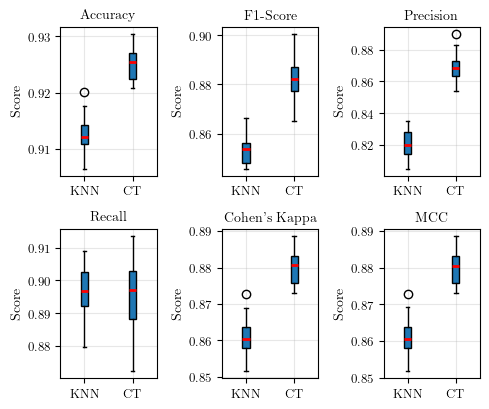


COMPREHENSIVE PERFORMANCE COMPARISON SUMMARY

Accuracy:
  KNN: 0.9127 ± 0.0032
  Decision Tree: 0.9252 ± 0.0029
  Mean Difference: -0.0125
  Paired t-test p-value: 0.0000
  Cohen's d (effect size): -3.9679
  Significant difference: Yes
  Effect size magnitude: Large

F1-Score:
  KNN: 0.8536 ± 0.0059
  Decision Tree: 0.8817 ± 0.0080
  Mean Difference: -0.0281
  Paired t-test p-value: 0.0000
  Cohen's d (effect size): -3.8917
  Significant difference: Yes
  Effect size magnitude: Large

Precision:
  KNN: 0.8206 ± 0.0085
  Decision Tree: 0.8694 ± 0.0086
  Mean Difference: -0.0488
  Paired t-test p-value: 0.0000
  Cohen's d (effect size): -5.5463
  Significant difference: Yes
  Effect size magnitude: Large

Recall:
  KNN: 0.8965 ± 0.0081
  Decision Tree: 0.8956 ± 0.0100
  Mean Difference: +0.0009
  Paired t-test p-value: 0.7216
  Cohen's d (effect size): 0.0965
  Significant difference: No
  Effect size magnitude: Negligible

Cohen's Kappa:
  KNN: 0.8611 ± 0.0050
  Decision Tree: 0.8803 ±

In [ ]:
from sklearn.metrics import make_scorer
from scipy.stats import ttest_rel

# Create results dictionary using the existing cross-validation scores
results_dict = {
    'Accuracy': {
        'KNN': knn_accuracy_scores,
        'Classification Tree': ct_accuracy_scores
    },
    'F1-Score': {
        'KNN': knn_f1_scores,
        'Classification Tree': ct_f1_scores
    },
    'Precision': {
        'KNN': knn_precision_scores,
        'Classification Tree': ct_precision_scores
    },
    'Recall': {
        'KNN': knn_recall_scores,
        'Classification Tree': ct_recall_scores
    },
    'Cohen\'s Kappa': {
        'KNN': knn_kappa_scores,
        'Classification Tree': ct_kappa_scores
    },
    'MCC': {
        'KNN': knn_mcc_scores,
        'Classification Tree': ct_mcc_scores
    }
}

# Create box plots
fig, axes = plt.subplots(2, 3, figsize=(ieee_text_width_inches*0.7, 6*0.7))
axes = axes.flatten()

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "savefig.bbox": "tight",
    "savefig.format": "pdf",
    "savefig.dpi": 300
})

# Create box plots for each metric
for i, (metric_name, scores_dict) in enumerate(results_dict.items()):
    ax = axes[i]
    
    # Prepare data for box plot
    data_to_plot = [scores_dict['KNN'], scores_dict['Classification Tree']]
    labels = ['KNN', 'CT']
    
    # Create box plot
    box_plot = ax.boxplot(data_to_plot, tick_labels=labels, patch_artist=True)
    
    for median_line in box_plot['medians']:
        median_line.set_color('red')
        median_line.set_linewidth(2)
    
    # Set title and labels
    ax.set_title(f'{metric_name}', fontweight='bold')
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

# Remove empty subplot if exists
if len(results_dict) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('report/boxplots.pdf', bbox_inches='tight', dpi=300)
plt.show()

print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON SUMMARY")
print("="*80)